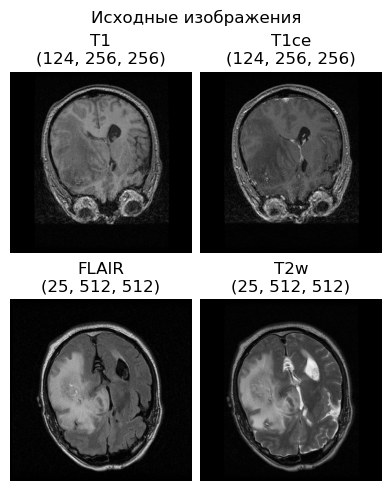

In [1]:
import numpy as np
from glio.jupyter_tools import show_slices, show_slices_arr
from glio.plot import *
import SimpleITK as sitk
t1n = r"D:\vkr\new\nii\5\0\[6] MR Ax 3DT1 SPGR S -- 124 _.nii.gz"
t1c = r"D:\vkr\new\nii\5\0\[8] MR Ax 3DT1 SPGR S+C -- 12_.nii.gz"
flair = r"D:\vkr\new\nii\5\0\[3] MR O-Ax Flair irFSE S -- _.nii.gz"
t2w = r"D:\vkr\new\nii\5\0\[4] MR AX T2 FRFSE -- 25 inst_.nii.gz"

def show_sitk_slices(seq): show_slices([sitk.GetArrayFromImage(i) for i in seq])
def sitk_grid(seq, title):
    arrs = [sitk.GetArrayFromImage(i) for i in seq]
    qimshow_grid([i[int(i.shape[0]//2)] for i in arrs], labels = (f'T1\n{arrs[0].shape}', f"T1ce\n{arrs[1].shape}", f'FLAIR\n{arrs[2].shape}', f'T2w\n{arrs[3].shape}'), cmap='gray', title=title)

t1n_orig, t1c_orig, flair_orig, t2w_orig = [sitk.ReadImage(i) for i in (t1n, t1c, flair, t2w)]

sitk_grid((t1n_orig,t1c_orig, flair_orig, t2w_orig), "Исходные изображения")

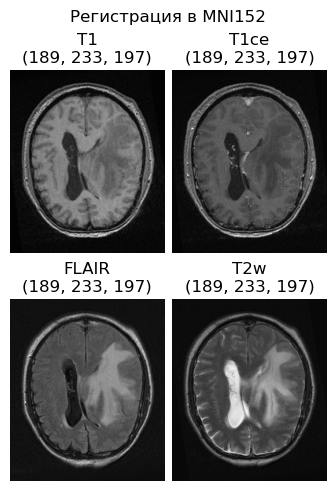

In [2]:
from glio.mri.registration import register_imgs_to_MNI152
t1n_mni, t1c_mni, flair_mni, t2w_mni = register_imgs_to_MNI152(t1n, (t1c, flair, t2w))

sitk_grid((t1n_mni, t1c_mni, flair_mni, t2w_mni), "Регистрация в MNI152")

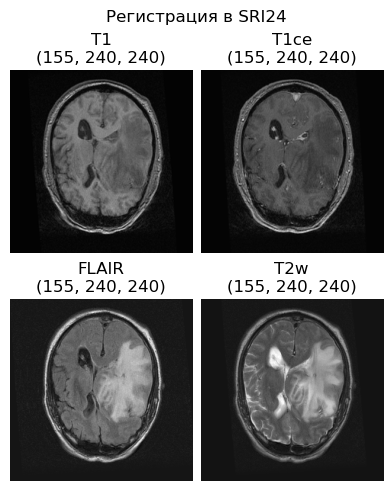

In [2]:
from glio.mri.registration import register_imgs_to_SRI24
t1n_sri, t1c_sri, flair_sri, t2w_sri = register_imgs_to_SRI24(t1n, (t1c, flair, t2w))

sitk_grid((t1n_sri, t1c_sri, flair_sri, t2w_sri), "Регистрация в SRI24")

d:\miniconda3\envs\pytorch311\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


File: C:\Users\nkshv\AppData\Local\Temp\tmpo46s9l2t\t1.nii.gz
preprocessing...
image shape after preprocessing:  (126, 155, 131)
prediction (CNN id)...
0
1
2
3
4
exporting segmentation...


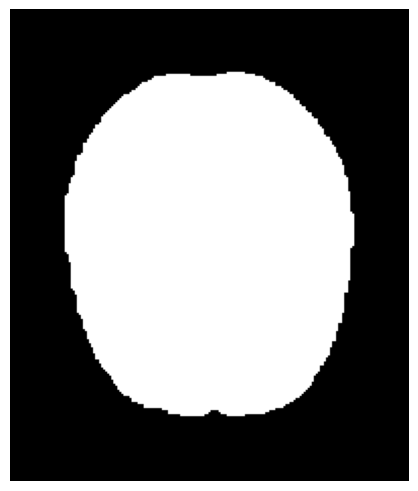

In [8]:
from glio.mri.skullstrip import get_brain_mask
brain_mask = get_brain_mask(t1c_mni)
qimshow(sitk.GetArrayFromImage(brain_mask)[90], cmap='gray')

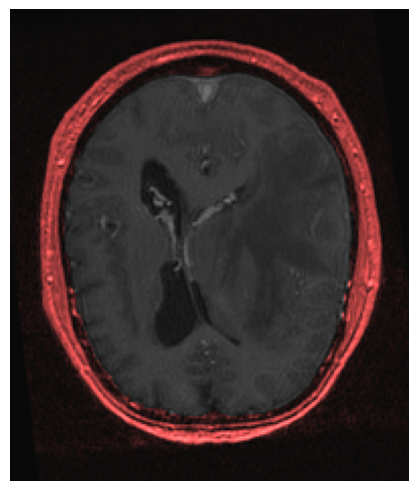

In [39]:
preview = sitk.GetArrayFromImage(t1c_mni)
preview = np.stack((preview, preview, preview))
mask = sitk.GetArrayFromImage(brain_mask)
preview[0] = np.clip(np.where(mask == 1, preview[0], preview[0]*3), preview.min(), preview.max())
qimshow(preview[:,90])

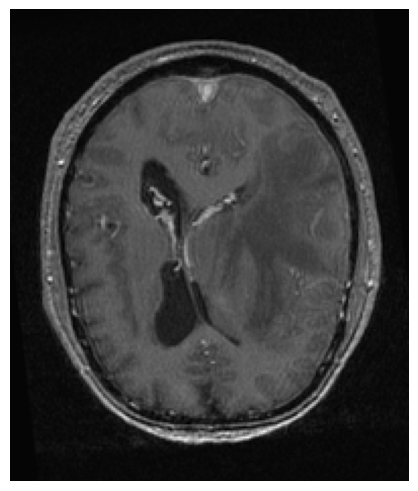

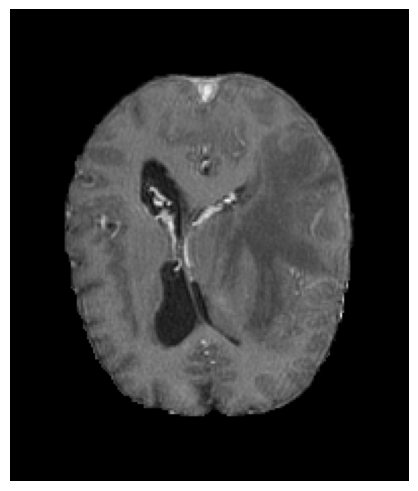

In [40]:
from glio.mri.skullstrip import apply_brain_mask
qimshow(sitk.GetArrayFromImage(t1c_mni)[90], cmap='gray')
qimshow(sitk.GetArrayFromImage(apply_brain_mask(t1c_mni, brain_mask))[90], cmap='gray')

d:\miniconda3\envs\pytorch311\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


File: C:\Users\nkshv\AppData\Local\Temp\tmpt9oqll8x\t1.nii.gz
preprocessing...
image shape after preprocessing:  (126, 155, 131)
prediction (CNN id)...
0
1
2
3
4
exporting segmentation...


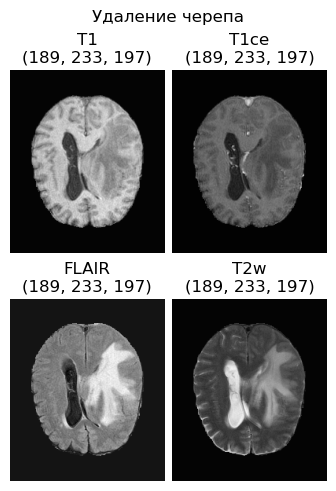

In [3]:
from glio.mri.skullstrip import skullstrip_imgs
t1c_skullstripped, t1n_skullstripped, flair_skullstripped, t2w_skullstripped = skullstrip_imgs(t1c_mni, (t1n_mni, flair_mni, t2w_mni))
sitk_grid((t1n_skullstripped, t1c_skullstripped, flair_skullstripped, t2w_skullstripped), "Удаление черепа")

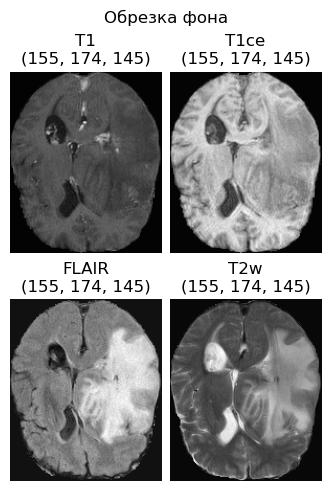

In [5]:
from glio.mri.crop_bg import crop_bg_imgs

t1c_cropped, t1n_cropped, flair_cropped, t2w_cropped = crop_bg_imgs((t1c_skullstripped, t1n_skullstripped, flair_skullstripped, t2w_skullstripped))
sitk_grid((t1c_cropped, t1n_cropped, flair_cropped, t2w_cropped), "Обрезка фона")